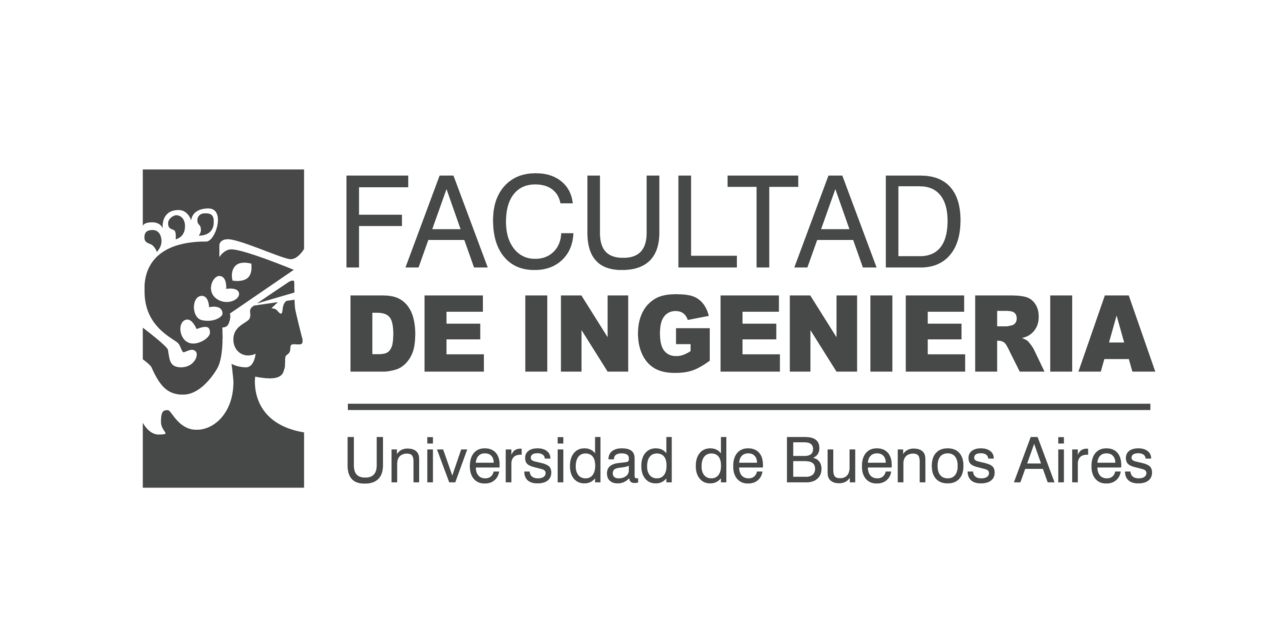
**Profesores:** <br />
Dr. Facundo Adrián Lucianna - facundolucianna@gmail.com <br />
Dr. Álvaro Gabriel Pizá - piza.ag@gmail.com <br />

**Alumnos:** <br />
Ing. Pablo Martin Gomez Verdini - gomezpablo86@gmail.com <br />
Ing. Diego Paciotti Iacchelli - diegopaciotti@gmail.com  <br />
Ing. Joaquin Gonzalez - joagonzalez@gmail.com <br />

**Repositorio Github**<br />
https://github.com/FIUBA-CEIA-18Co2024/AMIA-TP3 <br />


# SVM y CatBoost para clasificación de reviews de TripAdvisor - Inferencia y comparaciones de modelos

## Definiciones

In [1]:
from utils import *

In [2]:
random_state = 42
max_iter = 20000
# Etapas del pipeline para distintos modelos
pipeline_steps = {
    "linear_svc" : [
        ("vectorizer", TfidfVectorizer(min_df=10, max_df=0.9, ngram_range=(1, 2))),
        ("scaler", MaxAbsScaler()),
        ("classifier", OneVsOneClassifier(LinearSVC(class_weight="balanced", max_iter=max_iter, random_state=random_state)))
    ],
    "svc_linear": [
        ("vectorizer", TfidfVectorizer(min_df=10, max_df=0.9, ngram_range=(1, 2), max_features=10000)),
        ("scaler", MaxAbsScaler()),
        ("classifier", SVC(kernel="linear", class_weight="balanced", decision_function_shape="ovo", probability = True, max_iter=max_iter, random_state=random_state))
    ],
    "svc_rbf": [
        ("vectorizer", TfidfVectorizer(min_df=10, max_df=0.9, ngram_range=(1, 2))),
        ("dim_reduction", TruncatedSVD(random_state=random_state)),
        ("scaler", MinMaxScaler()),
        ("classifier", SVC(kernel="rbf", class_weight="balanced", decision_function_shape="ovo", probability = True, max_iter=max_iter, random_state=random_state))
    ],
    "catboost": [
        ("vectorizer", TfidfVectorizer(min_df=10, max_df=0.9, ngram_range=(1, 2))),
        ("dim_reduction", TruncatedSVD(random_state=random_state)),
        ("scaler", MinMaxScaler()),
        ("classifier", CatBoostClassifier(learning_rate= 0.02, task_type="GPU", random_state=random_state))
    ],
}

## Datos para 5 clases

In [ ]:
df = pd.read_csv("data/cleaned_dataset_processed_balanced.csv", encoding='utf-8')
X = df['cleaned_review']
y = df['rating']
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y)

### Instanciación de modelos con los mejores parámetros encontrados y evalucación para 5 clases

##### LinearSVC (liblinear) para 5 clases

[I 2024-11-27 00:45:51,355] Using an existing study with name 'linear_svc' instead of creating a new one.


{'C': 0.016}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 OneVsOneClassifier(estimator=LinearSVC(C=0.016,
                                                        class_weight='balanced',
                                                        max_iter=20000,
                                                        random_state=42)))])>

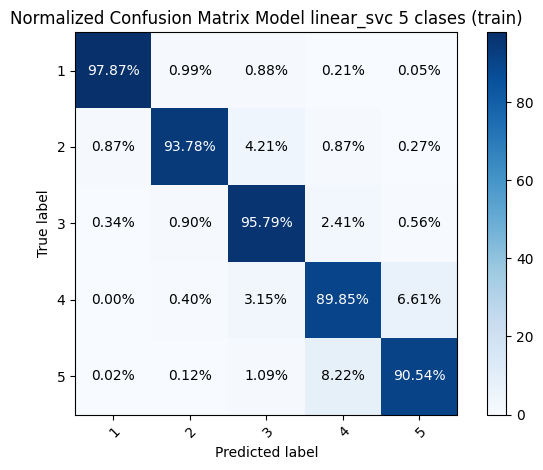

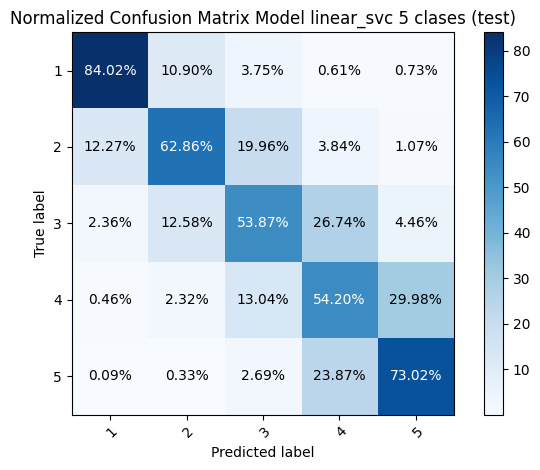

Score for Model linear_svc 5 clases
Precisión: [0.83014354 0.72093023 0.46545866 0.52198853 0.75439453]
Recuperación: [0.8401937  0.62860192 0.53866317 0.54202515 0.73015123]
Accuracy: 0.6595156834064684
F1-score: [0.83513839 0.67160775 0.49939247 0.53181818 0.74207493]


,precision,recall,f1-score,support,Modelo
1,0.830144,0.840194,0.835138,826.000000,linear_svc
2,0.720930,0.628602,0.671608,937.000000,linear_svc
3,0.465459,0.538663,0.499392,763.000000,linear_svc
4,0.521989,0.542025,0.531818,1511.000000,linear_svc
5,0.754395,0.730151,0.742075,2116.000000,linear_svc
accuracy,0.659516,0.659516,0.659516,0.659516,linear_svc
macro avg,0.658583,0.655927,0.656006,6153.000000,linear_svc
weighted avg,0.666566,0.659516,0.662110,6153.000000,linear_svc


In [ ]:
model_config = "linear_svc"
optuna_db = create_db(model_config)
pipeline_linear_svc = pipeline_config(model_config, optuna_db)
pipeline_linear_svc.fit(X_train, y_train)

y_train_pred = pipeline_linear_svc.predict(X_train)
y_test_pred = pipeline_linear_svc.predict(X_test)

cm_test_linear_svc, report_test_linear_svc = test_scoring(model_config, f"Model {model_config} 5 clases", y_train, y_train_pred, y_test, y_test_pred)

##### SVC kernel linear (LibSVM) para 5 clases

[I 2024-11-27 00:35:11,125] Using an existing study with name 'svc_linear' instead of creating a new one.


{'C': 0.03}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, max_features=10000, min_df=10,
                                 ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 SVC(C=0.03, class_weight='balanced',
                     decision_function_shape='ovo', kernel='linear',
                     max_iter=20000, probability=True, random_state=42))])>

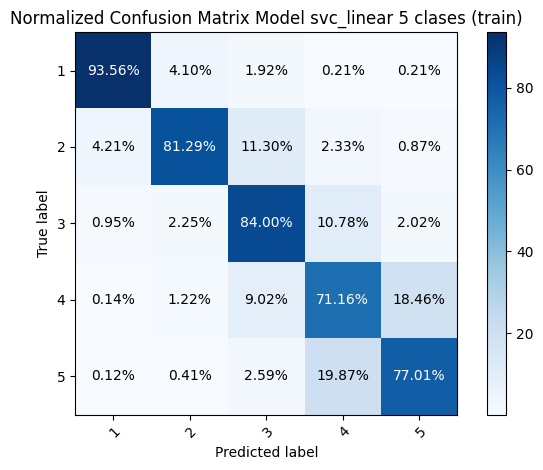

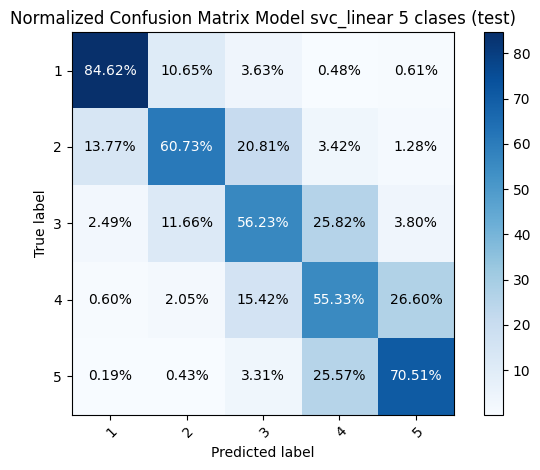

Score for Model svc_linear 5 clases
Precisión: [0.8127907  0.72391858 0.44827586 0.51925466 0.76907216]
Recuperación: [0.84624697 0.6072572  0.56225426 0.55327598 0.70510397]
Accuracy: 0.6541524459613197
F1-score: [0.82918149 0.66047591 0.49883721 0.53572573 0.7357002 ]


,precision,recall,f1-score,support,Modelo
1,0.812791,0.846247,0.829181,826.000000,svc_linear
2,0.723919,0.607257,0.660476,937.000000,svc_linear
3,0.448276,0.562254,0.498837,763.000000,svc_linear
4,0.519255,0.553276,0.535726,1511.000000,svc_linear
5,0.769072,0.705104,0.735700,2116.000000,svc_linear
accuracy,0.654152,0.654152,0.654152,0.654152,svc_linear
macro avg,0.654662,0.654828,0.651984,6153.000000,svc_linear
weighted avg,0.666937,0.654152,0.658314,6153.000000,svc_linear


In [ ]:
model_config = "svc_linear"
optuna_db = create_db(model_config)
pipeline_svc_linear = pipeline_config(model_config, optuna_db)
pipeline_svc_linear.fit(X_train, y_train)

y_train_pred = pipeline_svc_linear.predict(X_train)
y_test_pred = pipeline_svc_linear.predict(X_test)

cm_test_linear_svc, report_test_linear_svc = test_scoring(model_config, f"Model {model_config} 5 clases", y_train, y_train_pred, y_test, y_test_pred)

##### SVC kernel rbf (LibSVM) para 5 clases

[I 2024-11-29 00:35:02,130] Using an existing study with name 'svc_rbf' instead of creating a new one.


{'n_components': 1000, 'C': 1.8, 'gamma': 0.04}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1000, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1.8, class_weight='balanced',
                     decision_function_shape='ovo', gamma=0.04, max_iter=20000,
                     probability=True, random_state=42))])>

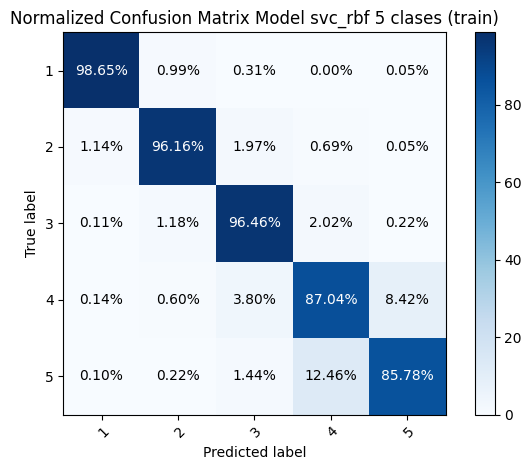

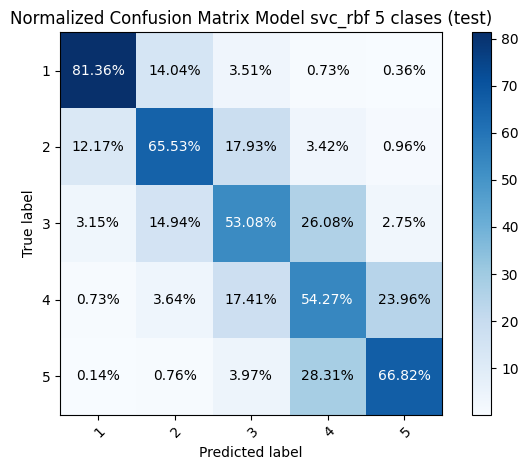

Score for Model svc_rbf 5 clases
Precisión: [0.81553398 0.67103825 0.42676502 0.49516908 0.78164732]
Recuperación: [0.81355932 0.65528282 0.53079948 0.54268696 0.66824197]
Accuracy: 0.6379002112790508
F1-score: [0.81454545 0.66306695 0.47313084 0.51784023 0.72050955]


,precision,recall,f1-score,support,Modelo
1,0.815534,0.813559,0.814545,826.0000,svc_rbf
2,0.671038,0.655283,0.663067,937.0000,svc_rbf
3,0.426765,0.530799,0.473131,763.0000,svc_rbf
4,0.495169,0.542687,0.517840,1511.0000,svc_rbf
5,0.781647,0.668242,0.720510,2116.0000,svc_rbf
accuracy,0.637900,0.637900,0.637900,0.6379,svc_rbf
macro avg,0.638031,0.642114,0.637819,6153.0000,svc_rbf
weighted avg,0.654995,0.637900,0.643940,6153.0000,svc_rbf


In [ ]:
model_config = "svc_rbf"
optuna_db = create_db(model_config)
pipeline_svc_rbf = pipeline_config(model_config, optuna_db)
pipeline_svc_rbf.fit(X_train, y_train)

y_train_pred = pipeline_svc_rbf.predict(X_train)
y_test_pred = pipeline_svc_rbf.predict(X_test)

cm_test_svc_rbf, report_test_svc_rbf = test_scoring(model_config, f"Model {model_config} 5 clases", y_train, y_train_pred, y_test, y_test_pred)

##### Catboost para 5 clases (GPU)

[I 2024-11-27 00:22:30,315] Using an existing study with name 'catboost' instead of creating a new one.


{'n_components': 1250, 'iterations': 2500, 'depth': 8}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1250, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000002230C92DAF0>)])>

0:	learn: 1.5820737	total: 20.9ms	remaining: 20.9s
1:	learn: 1.5567327	total: 41ms	remaining: 20.4s
2:	learn: 1.5330273	total: 60.7ms	remaining: 20.2s
3:	learn: 1.5107474	total: 81.1ms	remaining: 20.2s
4:	learn: 1.4899608	total: 99.7ms	remaining: 19.8s
5:	learn: 1.4700570	total: 119ms	remaining: 19.7s
6:	learn: 1.4514387	total: 138ms	remaining: 19.5s
7:	learn: 1.4338099	total: 156ms	remaining: 19.4s
8:	learn: 1.4168837	total: 175ms	remaining: 19.3s
9:	learn: 1.4008980	total: 195ms	remaining: 19.3s
10:	learn: 1.3857643	total: 216ms	remaining: 19.4s
11:	learn: 1.3710747	total: 235ms	remaining: 19.4s
12:	learn: 1.3566277	total: 254ms	remaining: 19.3s
13:	learn: 1.3432411	total: 273ms	remaining: 19.2s
14:	learn: 1.3305062	total: 293ms	remaining: 19.2s
15:	learn: 1.3181500	total: 311ms	remaining: 19.1s
16:	learn: 1.3060757	total: 330ms	remaining: 19.1s
17:	learn: 1.2945262	total: 349ms	remaining: 19.1s
18:	learn: 1.2835105	total: 369ms	remaining: 19s
19:	learn: 1.2727806	total: 389ms	remain

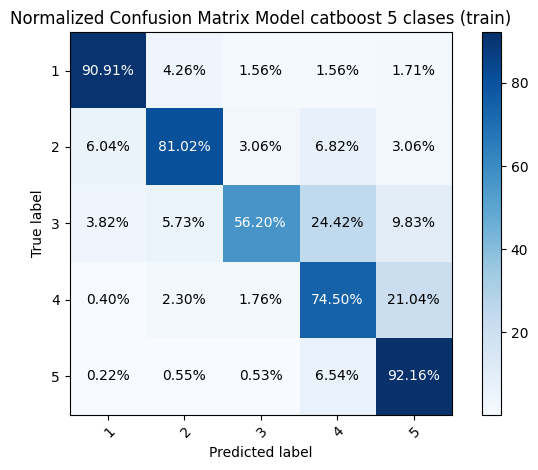

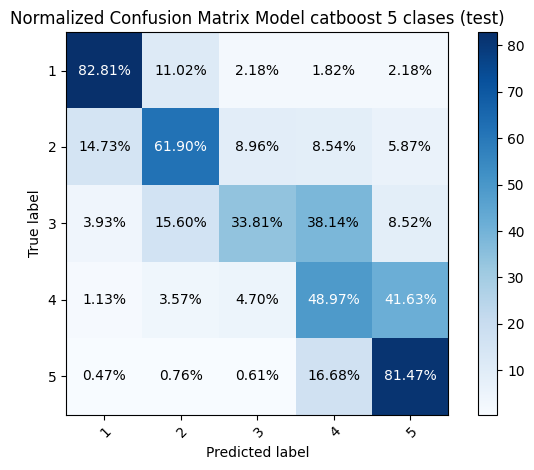

Score for Model catboost 5 clases
Precisión: [0.778157   0.6744186  0.58108108 0.50033807 0.69209153]
Recuperación: [0.82808717 0.6189968  0.33813893 0.48974189 0.8147448 ]
Accuracy: 0.6478140744352349
F1-score: [0.80234604 0.64552031 0.42750621 0.49498328 0.74842631]


,precision,recall,f1-score,support,Modelo
1,0.778157,0.828087,0.802346,826.000000,catboost
2,0.674419,0.618997,0.645520,937.000000,catboost
3,0.581081,0.338139,0.427506,763.000000,catboost
4,0.500338,0.489742,0.494983,1511.000000,catboost
5,0.692092,0.814745,0.748426,2116.000000,catboost
accuracy,0.647814,0.647814,0.647814,0.647814,catboost
macro avg,0.645217,0.617942,0.623756,6153.000000,catboost
weighted avg,0.640099,0.647814,0.637960,6153.000000,catboost


In [ ]:
model_config = "catboost"
optuna_db = create_db(model_config)
pipeline_catboost = pipeline_config(model_config, optuna_db)
pipeline_catboost.fit(X_train, y_train)

y_train_pred = pipeline_catboost.predict(X_train)
y_test_pred = pipeline_catboost.predict(X_test)

cm_test_catboost, report_test_catboost = test_scoring(model_config, f"Model {model_config} 5 clases", y_train, y_train_pred, y_test, y_test_pred)

##### Comparación modelos

,Modelo,Clase,precision,recall,f1-score,support
0,linear_svc,1,0.830144,0.840194,0.835138,826.000000
1,linear_svc,2,0.720930,0.628602,0.671608,937.000000
2,linear_svc,3,0.465459,0.538663,0.499392,763.000000
3,linear_svc,4,0.521989,0.542025,0.531818,1511.000000
4,linear_svc,5,0.754395,0.730151,0.742075,2116.000000
5,linear_svc,accuracy,0.659516,0.659516,0.659516,0.659516
6,linear_svc,macro avg,0.658583,0.655927,0.656006,6153.000000
7,linear_svc,weighted avg,0.666566,0.659516,0.662110,6153.000000
8,linear_svc,1,0.830144,0.840194,0.835138,826.000000
9,linear_svc,2,0.720930,0.628602,0.671608,937.000000


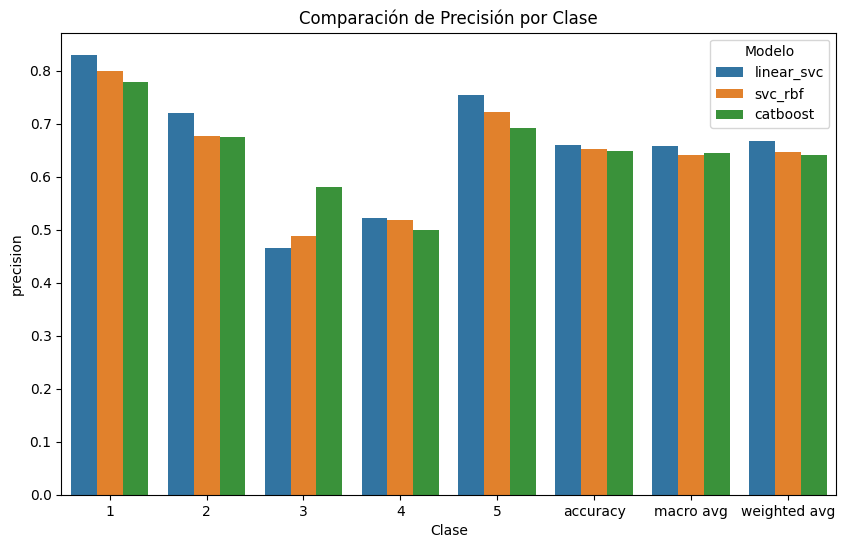

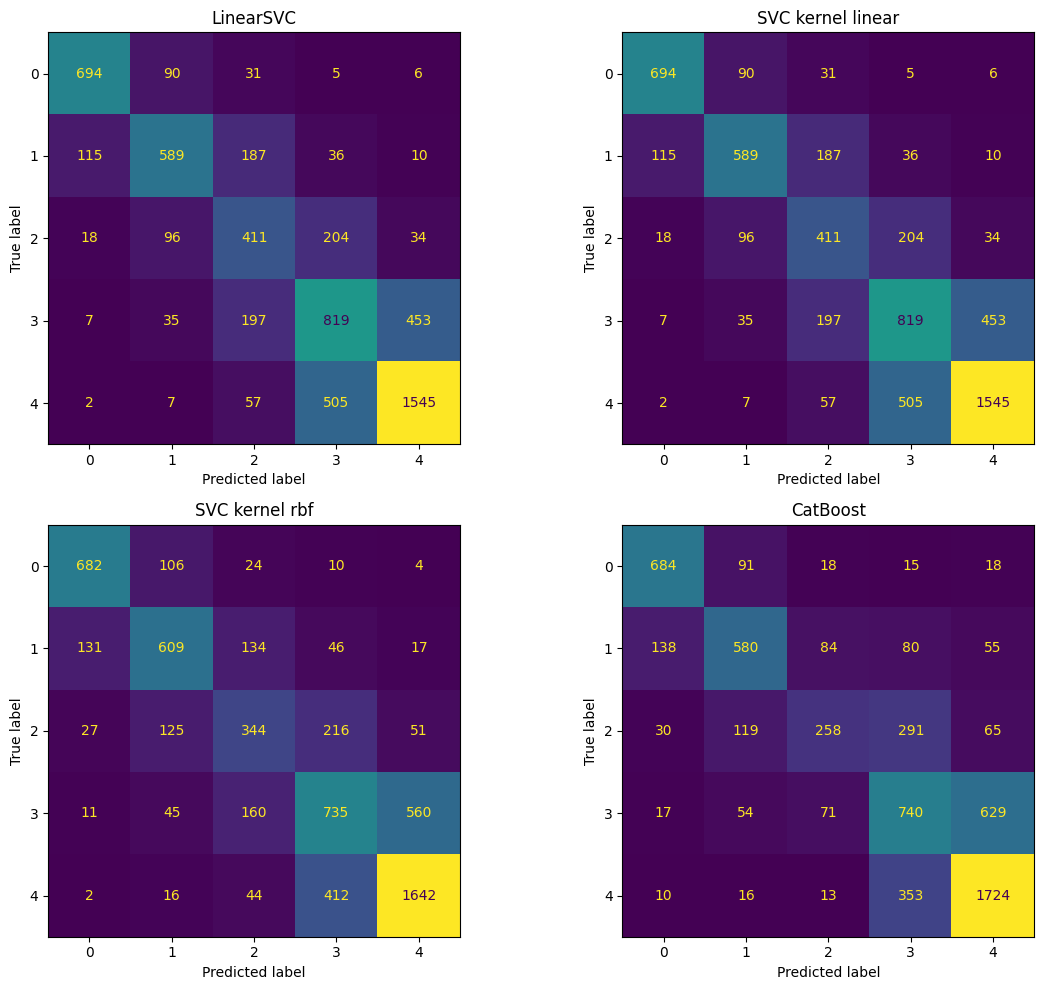

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

combined_reports = pd.concat([report_test_linear_svc, report_test_linear_svc, report_test_svc_rbf, report_test_catboost])
combined_reports = combined_reports.reset_index().rename(columns={"index": "Clase"})
combined_reports = combined_reports[["Modelo", "Clase", "precision", "recall", "f1-score", "support"]]
display(combined_reports)

plt.figure(figsize=(10, 6))
sns.barplot(data=combined_reports, x="Clase", y="precision", hue="Modelo")
plt.title("Comparación de Precisión por Clase")
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas
model_names = ["LinearSVC", "SVC kernel linear", "SVC kernel rbf", "CatBoost"]
cms = [cm_test_linear_svc, cm_test_linear_svc, cm_test_svc_rbf, cm_test_catboost]

# Iterar sobre cada matriz y su subplot
for ax, cm, name in zip(axes.ravel(), cms, model_names):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(name)

# Ajustar diseño
plt.tight_layout()
plt.show()


### Ensemble

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CatBoostWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        return self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X).ravel()
    
    def predict_proba(self, X):
        return self.model.predict_proba(X)

#### Hard voting classifier

[I 2024-11-27 14:33:49,926] Using an existing study with name 'linear_svc' instead of creating a new one.


{'C': 0.016}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 OneVsOneClassifier(estimator=LinearSVC(C=0.016,
                                                        class_weight='balanced',
                                                        max_iter=20000,
                                                        random_state=42)))])>

[I 2024-11-27 14:33:49,963] Using an existing study with name 'svc_rbf' instead of creating a new one.


{'n_components': 1000, 'C': 18.0, 'gamma': 0.04}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1000, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=18.0, class_weight='balanced',
                     decision_function_shape='ovo', gamma=0.04, max_iter=20000,
                     probability=True, random_state=42))])>

[I 2024-11-27 14:33:49,996] Using an existing study with name 'catboost' instead of creating a new one.


{'n_components': 1250, 'iterations': 2500, 'depth': 8}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1250, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000001DFD4905D60>)])>

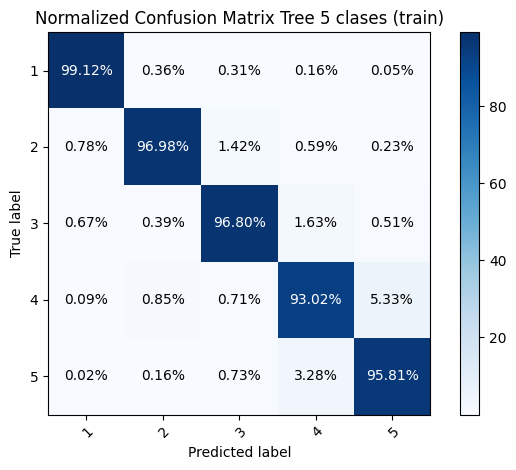

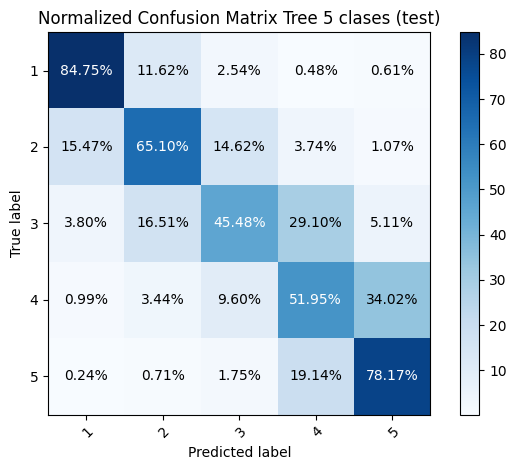

Precisión: [0.78299776 0.6785317  0.50509461 0.5410062  0.74437444]
Recuperación: [0.84745763 0.65101387 0.45478375 0.51952349 0.78166352]
Accuracy: 0.6656915325857305
F1-score: [0.81395349 0.66448802 0.47862069 0.53004727 0.76256339]
              precision    recall  f1-score   support

           1       0.78      0.85      0.81       826
           2       0.68      0.65      0.66       937
           3       0.51      0.45      0.48       763
           4       0.54      0.52      0.53      1511
           5       0.74      0.78      0.76      2116

    accuracy                           0.67      6153
   macro avg       0.65      0.65      0.65      6153
weighted avg       0.66      0.67      0.66      6153



In [ ]:
model_config = "linear_svc"
optuna_db = create_db(model_config)
linear_svc = pipeline_config(model_config, optuna_db)

model_config = "svc_rbf"
optuna_db = create_db(model_config)
svc = pipeline_config(model_config, optuna_db)

model_config = "catboost"
optuna_db = create_db(model_config)
catboost = pipeline_config(model_config, optuna_db)
catboost = CatBoostWrapper(catboost)

classifiers = [('LinearSVC', linear_svc),
               ('SVC RBF', svc),
               ('Catboost', catboost),
              ]

vc = VotingClassifier(estimators=classifiers, voting="hard", verbose=True, n_jobs=-1)
vc.fit(X_train, y_train)

y_train_pred = vc.predict(X_train)
y_test_pred = vc.predict(X_test)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
display_cm_normalized(cm_train, 'Tree 5 clases (train)')
display_cm_normalized(cm_test, 'Tree 5 clases (test)')

print(f"Precisión: {precision_score(y_test, y_test_pred, zero_division=0, pos_label=1, average=None)}")
print(f"Recuperación: {recall_score(y_test, y_test_pred, zero_division=0, pos_label=1, average=None)}")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"F1-score: {f1_score(y_test, y_test_pred, average=None)}")
print(classification_report(y_test, y_test_pred))

#### Soft voting classifier

[I 2024-11-27 16:52:13,073] Using an existing study with name 'svc_linear' instead of creating a new one.


{'C': 0.03}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, max_features=10000, min_df=10,
                                 ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 SVC(C=0.03, class_weight='balanced',
                     decision_function_shape='ovo', kernel='linear',
                     max_iter=20000, probability=True, random_state=42))])>

[I 2024-11-27 16:52:13,102] Using an existing study with name 'svc_rbf' instead of creating a new one.


{'n_components': 1000, 'C': 18.0, 'gamma': 0.04}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1000, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=18.0, class_weight='balanced',
                     decision_function_shape='ovo', gamma=0.04, max_iter=20000,
                     probability=True, random_state=42))])>

[I 2024-11-27 16:52:13,131] Using an existing study with name 'catboost' instead of creating a new one.


{'n_components': 1250, 'iterations': 2500, 'depth': 8}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1250, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000001521696E120>)])>

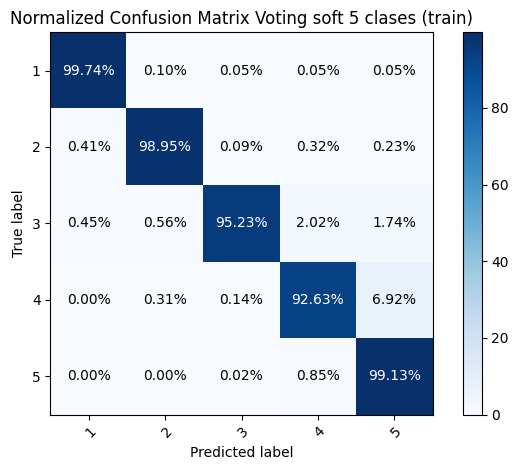

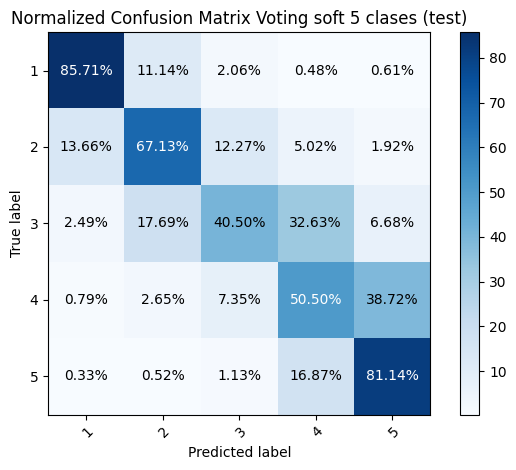

Precisión: [0.81006865 0.69349504 0.53645833 0.53732394 0.7226431 ]
Recuperación: [0.85714286 0.67129136 0.40498034 0.5049636  0.81143667]
Accuracy: 0.6705672029904112
F1-score: [0.83294118 0.68221258 0.46153846 0.52064142 0.76447017]
              precision    recall  f1-score   support

           1       0.81      0.86      0.83       826
           2       0.69      0.67      0.68       937
           3       0.54      0.40      0.46       763
           4       0.54      0.50      0.52      1511
           5       0.72      0.81      0.76      2116

    accuracy                           0.67      6153
   macro avg       0.66      0.65      0.65      6153
weighted avg       0.66      0.67      0.66      6153



In [ ]:
model_config = "svc_linear"
optuna_db = create_db(model_config)
svc_linear = pipeline_config(model_config, optuna_db)

model_config = "svc_rbf"
optuna_db = create_db(model_config)
svc = pipeline_config(model_config, optuna_db)

model_config = "catboost"
optuna_db = create_db(model_config)
catboost = pipeline_config(model_config, optuna_db)
catboost = CatBoostWrapper(catboost)

classifiers = [('SVC', svc),
               ('SVC Linear', svc_linear),
               ('Catboost', catboost)
              ]

vc = VotingClassifier(estimators=classifiers, voting="soft", verbose=True, n_jobs=-1)
vc.fit(X_train, y_train)

y_train_pred = vc.predict(X_train)
y_test_pred = vc.predict(X_test)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
display_cm_normalized(cm_train, 'Voting soft 5 clases (train)')
display_cm_normalized(cm_test, 'Voting soft 5 clases (test)')

print(f"Precisión: {precision_score(y_test, y_test_pred, zero_division=0, pos_label=1, average=None)}")
print(f"Recuperación: {recall_score(y_test, y_test_pred, zero_division=0, pos_label=1, average=None)}")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"F1-score: {f1_score(y_test, y_test_pred, average=None)}")
print(classification_report(y_test, y_test_pred))

## Datos para 3 clases

In [3]:
df = pd.read_csv("data/cleaned_dataset_processed_balanced.csv", encoding='utf-8')
X = df['cleaned_review']
y = df['three_classes']
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y)

### Instanciación de modelos con los mejores parámetros encontrados y evalucación para 3 clases

##### LinearSVC (liblinear) para 3 clases

[I 2024-11-25 22:27:02,152] Using an existing study with name 'linear_svc' instead of creating a new one.


{'C': 0.075}

[('vectorizer', TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
 ('scaler', MaxAbsScaler()),
 ('classifier',
  OneVsOneClassifier(estimator=LinearSVC(C=0.064, class_weight='balanced',
                                         max_iter=10000, random_state=42)))]

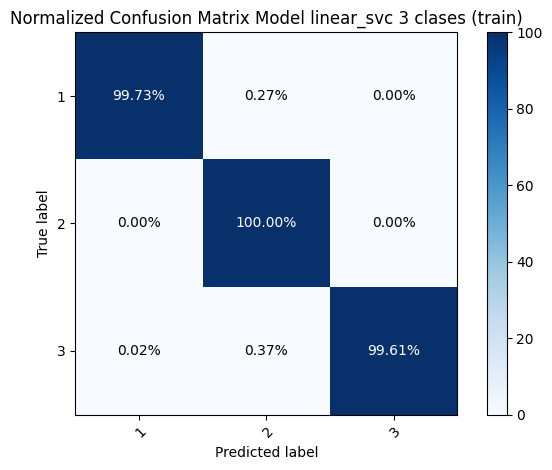

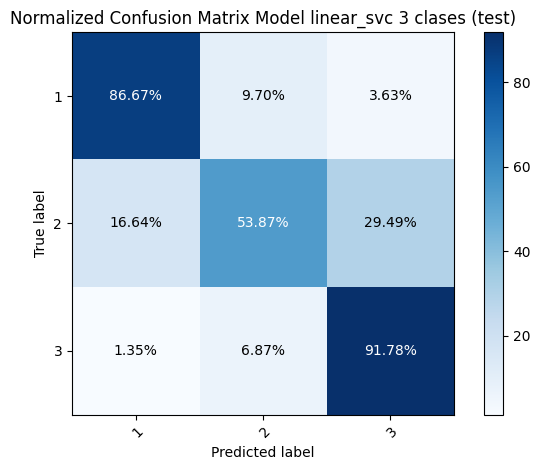

Score for Model linear_svc 3 clases
Precisión: [0.89671362 0.49458484 0.92012161]
Recuperación: [0.86670448 0.53866317 0.91783843]
Accuracy: 0.856167723061921
F1-score: [0.88145371 0.51568381 0.91897861]


,precision,recall,f1-score,support,linear_svc
0,0.896714,0.866704,0.881454,1763.000000,linear_svc
1,0.494585,0.538663,0.515684,763.000000,linear_svc
2,0.920122,0.917838,0.918979,3627.000000,linear_svc
accuracy,0.856168,0.856168,0.856168,0.856168,linear_svc
macro avg,0.770473,0.774402,0.772039,6153.000000,linear_svc
weighted avg,0.860646,0.856168,0.858216,6153.000000,linear_svc


In [ ]:
model_config = "linear_svc"
optuna_db = create_db(model_config, 3)
pipeline_linear_svc_3 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)
pipeline_linear_svc_3.fit(X_train, y_train)

y_train_pred = pipeline_linear_svc_3.predict(X_train)
y_test_pred = pipeline_linear_svc_3.predict(X_test)

cm_test_linear_svc_3, report_test_linear_svc_3 = test_scoring(model_config, f"Model {model_config} 3 clases", y_train, y_train_pred, y_test, y_test_pred)

##### SVC kernel linear (LibSVM) para 3 clases

[I 2024-11-27 03:24:33,956] Using an existing study with name 'svc_linear' instead of creating a new one.


{'C': 0.22}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, max_features=10000, min_df=10,
                                 ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 SVC(C=0.22, class_weight='balanced',
                     decision_function_shape='ovo', kernel='linear',
                     max_iter=20000, probability=True, random_state=42))])>

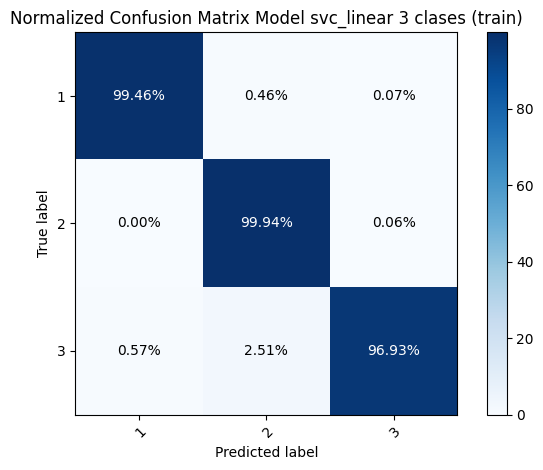

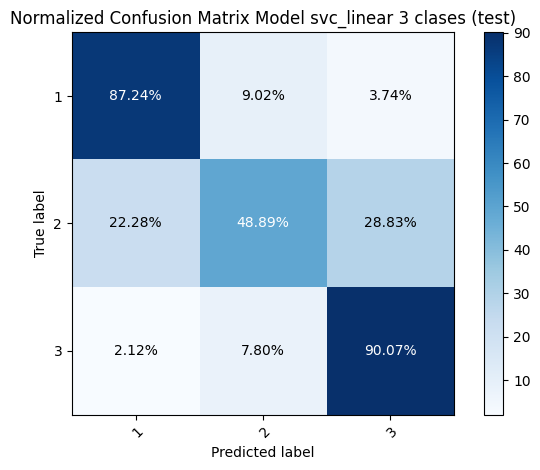

Score for Model svc_linear 3 clases
Precisión: [0.86162465 0.45766871 0.91950464]
Recuperación: [0.87237663 0.48885976 0.90074442]
Accuracy: 0.841540711847879
F1-score: [0.86696731 0.47275032 0.91002786]


,precision,recall,f1-score,support,Modelo
0,0.861625,0.872377,0.866967,1763.000000,svc_linear
1,0.457669,0.488860,0.472750,763.000000,svc_linear
2,0.919505,0.900744,0.910028,3627.000000,svc_linear
accuracy,0.841541,0.841541,0.841541,0.841541,svc_linear
macro avg,0.746266,0.753994,0.749915,6153.000000,svc_linear
weighted avg,0.845651,0.841541,0.843465,6153.000000,svc_linear


In [ ]:
model_config = "svc_linear"
optuna_db = create_db(model_config, 3)
pipeline_svc_linear_3 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)
pipeline_svc_linear_3.fit(X_train, y_train)

y_train_pred = pipeline_svc_linear_3.predict(X_train)
y_test_pred = pipeline_svc_linear_3.predict(X_test)

cm_test_linear_svc_3, report_test_linear_svc_3 = test_scoring(model_config, f"Model {model_config} 3 clases", y_train, y_train_pred, y_test, y_test_pred)

##### SVC kernel rbf (LibSVM) para 3 clases

[I 2024-11-29 02:49:12,536] Using an existing study with name 'svc_rbf' instead of creating a new one.


{'n_components': 1000, 'C': 1.8, 'gamma': 0.04}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1000, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1.8, class_weight='balanced',
                     decision_function_shape='ovo', gamma=0.04, max_iter=20000,
                     probability=True, random_state=42))])>

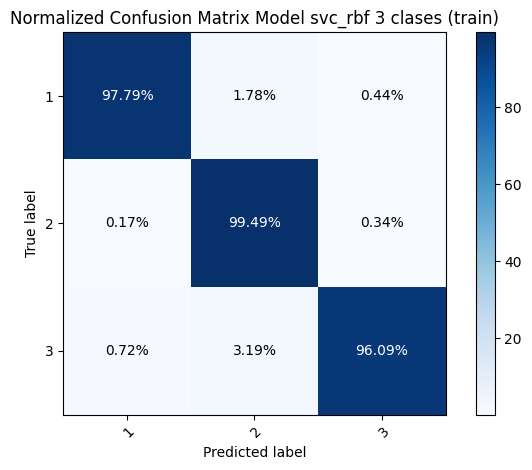

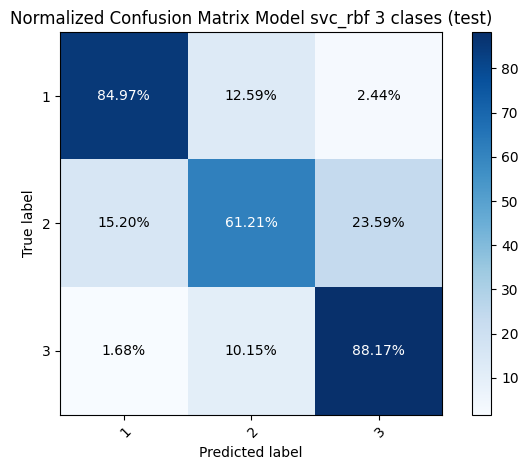

Score for Model svc_rbf 3 clases
Precisión: [0.89432836 0.44181646 0.93481438]
Recuperación: [0.84968803 0.61205767 0.88172043]
Accuracy: 0.8391028766455387
F1-score: [0.87143688 0.51318681 0.90749149]


,precision,recall,f1-score,support,Modelo
0,0.894328,0.849688,0.871437,1763.000000,svc_rbf
1,0.441816,0.612058,0.513187,763.000000,svc_rbf
2,0.934814,0.881720,0.907491,3627.000000,svc_rbf
accuracy,0.839103,0.839103,0.839103,0.839103,svc_rbf
macro avg,0.756986,0.781155,0.764038,6153.000000,svc_rbf
weighted avg,0.862080,0.839103,0.848265,6153.000000,svc_rbf


In [ ]:
model_config = "svc_rbf"
optuna_db = create_db(model_config, 3)
pipeline_svc_rbf_3 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)
pipeline_svc_rbf_3.fit(X_train, y_train)

y_train_pred = pipeline_svc_rbf_3.predict(X_train)
y_test_pred = pipeline_svc_rbf_3.predict(X_test)

cm_test_svc_rbf_3, report_test_svc_rbf_3 = test_scoring(model_config, f"Model {model_config} 3 clases", y_train, y_train_pred, y_test, y_test_pred)

##### Catboost para 3 clases (GPU)

[I 2024-12-09 20:42:43,675] Using an existing study with name 'catboost' instead of creating a new one.


{'n_components': 1500, 'iterations': 2500, 'depth': 6}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1500, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000001CFADF36750>)])>

0:	learn: 1.0757940	total: 24.8ms	remaining: 24.8s
1:	learn: 1.0541934	total: 39.7ms	remaining: 19.8s
2:	learn: 1.0337180	total: 54.5ms	remaining: 18.1s
3:	learn: 1.0142124	total: 68.8ms	remaining: 17.1s
4:	learn: 0.9956721	total: 84ms	remaining: 16.7s
5:	learn: 0.9778459	total: 98ms	remaining: 16.2s
6:	learn: 0.9608965	total: 112ms	remaining: 15.9s
7:	learn: 0.9447389	total: 127ms	remaining: 15.7s
8:	learn: 0.9291176	total: 141ms	remaining: 15.5s
9:	learn: 0.9141773	total: 155ms	remaining: 15.4s
10:	learn: 0.8999725	total: 171ms	remaining: 15.4s
11:	learn: 0.8861891	total: 187ms	remaining: 15.4s
12:	learn: 0.8729367	total: 201ms	remaining: 15.3s
13:	learn: 0.8602592	total: 217ms	remaining: 15.3s
14:	learn: 0.8481946	total: 231ms	remaining: 15.2s
15:	learn: 0.8365363	total: 246ms	remaining: 15.1s
16:	learn: 0.8252133	total: 262ms	remaining: 15.1s
17:	learn: 0.8142784	total: 276ms	remaining: 15.1s
18:	learn: 0.8037890	total: 293ms	remaining: 15.1s
19:	learn: 0.7937180	total: 307ms	remai

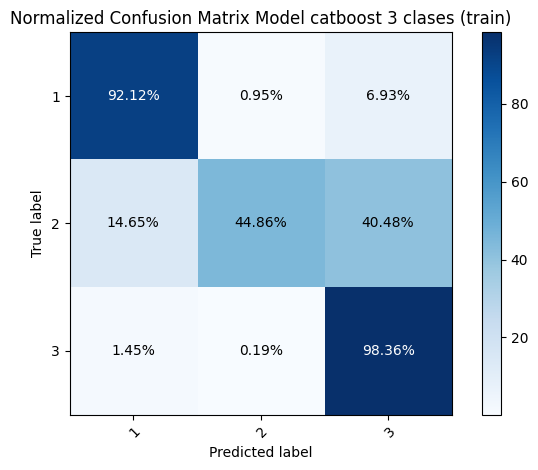

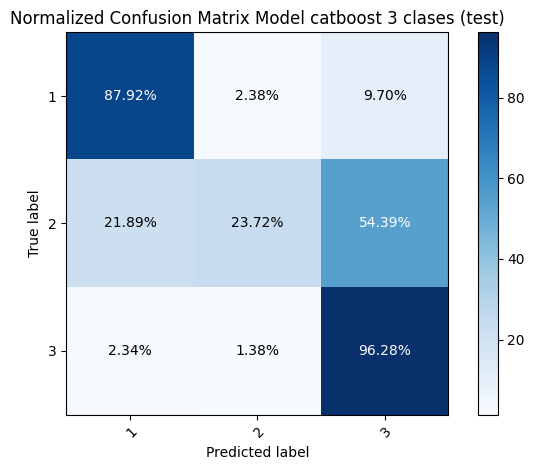

Score for Model catboost 3 clases
Precisión: [0.86015538 0.66300366 0.85630211]
Recuperación: [0.87918321 0.23722149 0.96277916]
Accuracy: 0.8488542174549001
F1-score: [0.86956522 0.34942085 0.9064244 ]


,precision,recall,f1-score,support,Modelo
0,0.860155,0.879183,0.869565,1763.000000,catboost
1,0.663004,0.237221,0.349421,763.000000,catboost
2,0.856302,0.962779,0.906424,3627.000000,catboost
accuracy,0.848854,0.848854,0.848854,0.848854,catboost
macro avg,0.793154,0.693061,0.708470,6153.000000,catboost
weighted avg,0.833436,0.848854,0.826792,6153.000000,catboost


In [4]:
model_config = "catboost"
optuna_db = create_db(model_config, 3)
pipeline_catboost_3 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)
pipeline_catboost_3.fit(X_train, y_train)

y_train_pred = pipeline_catboost_3.predict(X_train)
y_test_pred = pipeline_catboost_3.predict(X_test)

cm_test_catboost_3, report_test_catboost_3 = test_scoring(model_config, f"Model {model_config} 3 clases", y_train, y_train_pred, y_test, y_test_pred)

### Ensemble

In [4]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CatBoostWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        return self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X).ravel()
    
    def predict_proba(self, X):
        return self.model.predict_proba(X)

#### Hard voting classifier

[I 2024-12-09 21:11:21,093] Using an existing study with name 'linear_svc' instead of creating a new one.


{'C': 0.075}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 OneVsOneClassifier(estimator=LinearSVC(C=0.075,
                                                        class_weight='balanced',
                                                        max_iter=20000,
                                                        random_state=42)))])>

[I 2024-12-09 21:11:21,126] Using an existing study with name 'svc_rbf' instead of creating a new one.


{'n_components': 1000, 'C': 1.8, 'gamma': 0.04}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1000, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1.8, class_weight='balanced',
                     decision_function_shape='ovo', gamma=0.04, max_iter=20000,
                     probability=True, random_state=42))])>

[I 2024-12-09 21:11:21,163] Using an existing study with name 'catboost' instead of creating a new one.


{'n_components': 1500, 'iterations': 2500, 'depth': 6}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1500, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000191361123C0>)])>

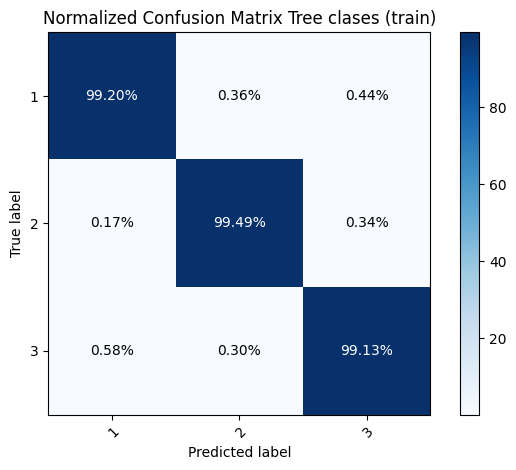

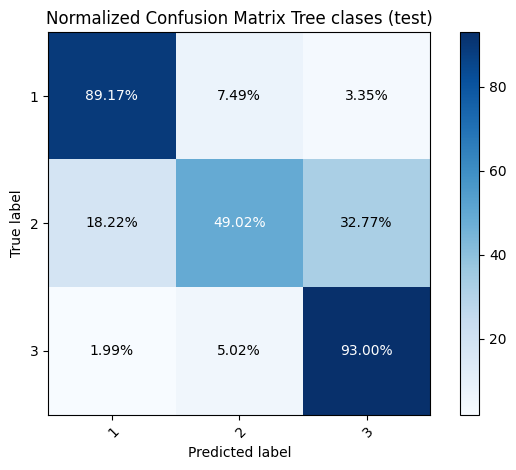

Precisión: [0.88166012 0.54360465 0.91607822]
Recuperación: [0.89166194 0.49017038 0.92996967]
Accuracy: 0.8644563627498781
F1-score: [0.88663283 0.51550655 0.92297168]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1763
           1       0.54      0.49      0.52       763
           2       0.92      0.93      0.92      3627

    accuracy                           0.86      6153
   macro avg       0.78      0.77      0.78      6153
weighted avg       0.86      0.86      0.86      6153

CPU times: total: 15.9 s
Wall time: 7min 47s


In [10]:
%%time
model_config = "linear_svc"
optuna_db = create_db(model_config, 3)
linear_svc_3 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "svc_rbf"
optuna_db = create_db(model_config, 3)
svc_3 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "catboost"
optuna_db = create_db(model_config, 3)
catboost_3 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)
catboost_3 = CatBoostWrapper(catboost_3)

classifiers = [('LinearSVC', linear_svc_3),
               ('SVC RBF', svc_3),
               ('Catboost', catboost_3),
              ]

vc = VotingClassifier(estimators=classifiers, voting="hard", verbose=True, n_jobs=-1)
vc.fit(X_train, y_train)

y_train_pred = vc.predict(X_train)
y_test_pred = vc.predict(X_test)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
display_cm_normalized(cm_train, 'Tree clases (train)')
display_cm_normalized(cm_test, 'Tree clases (test)')

print(f"Precisión: {precision_score(y_test, y_test_pred, zero_division=0, pos_label=1, average=None)}")
print(f"Recuperación: {recall_score(y_test, y_test_pred, zero_division=0, pos_label=1, average=None)}")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"F1-score: {f1_score(y_test, y_test_pred, average=None)}")
print(classification_report(y_test, y_test_pred))

#### Soft voting classifier

[I 2024-12-09 21:19:08,691] Using an existing study with name 'svc_linear' instead of creating a new one.


{'C': 0.22}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, max_features=10000, min_df=10,
                                 ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 SVC(C=0.22, class_weight='balanced',
                     decision_function_shape='ovo', kernel='linear',
                     max_iter=20000, probability=True, random_state=42))])>

[I 2024-12-09 21:19:08,733] Using an existing study with name 'svc_rbf' instead of creating a new one.


{'n_components': 1000, 'C': 1.8, 'gamma': 0.04}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1000, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1.8, class_weight='balanced',
                     decision_function_shape='ovo', gamma=0.04, max_iter=20000,
                     probability=True, random_state=42))])>

[I 2024-12-09 21:19:08,762] Using an existing study with name 'catboost' instead of creating a new one.


{'n_components': 1500, 'iterations': 2500, 'depth': 6}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1500, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000191361123C0>)])>

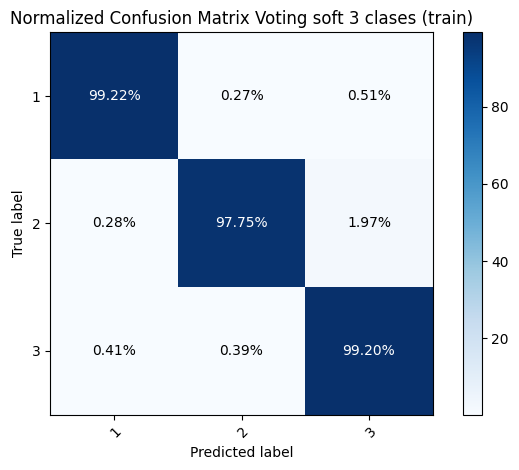

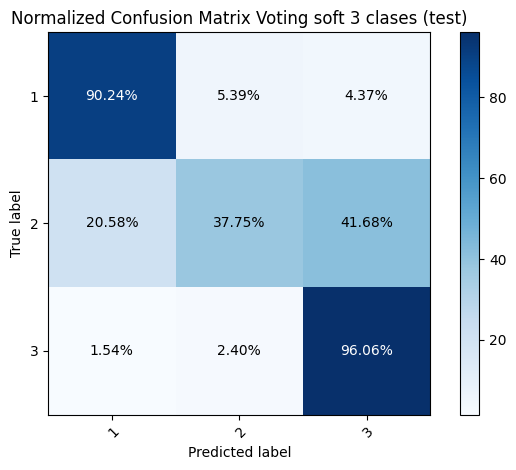

Precisión: [0.88192905 0.61276596 0.89816963]
Recuperación: [0.90243902 0.3774574  0.96057348]
Accuracy: 0.8716073460100764
F1-score: [0.89206616 0.46715328 0.92832401]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1763
           1       0.61      0.38      0.47       763
           2       0.90      0.96      0.93      3627

    accuracy                           0.87      6153
   macro avg       0.80      0.75      0.76      6153
weighted avg       0.86      0.87      0.86      6153

CPU times: total: 30.5 s
Wall time: 9min 4s


In [11]:
%%time
model_config = "svc_linear"
optuna_db = create_db(model_config, 3)
svc_linear_32 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "svc_rbf"
optuna_db = create_db(model_config, 3)
svc_32 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "catboost"
optuna_db = create_db(model_config, 3)
catboost_32 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)
catboost_32 = CatBoostWrapper(catboost_32)

classifiers = [('SVC', svc_32),
               ('SVC Linear', svc_linear_32),
               ('Catboost', catboost_32)
              ]

vc = VotingClassifier(estimators=classifiers, voting="soft", verbose=True, n_jobs=-1)
vc.fit(X_train, y_train)

y_train_pred = vc.predict(X_train)
y_test_pred = vc.predict(X_test)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
display_cm_normalized(cm_train, 'Voting soft 3 clases (train)')
display_cm_normalized(cm_test, 'Voting soft 3 clases (test)')

print(f"Precisión: {precision_score(y_test, y_test_pred, zero_division=0, pos_label=1, average=None)}")
print(f"Recuperación: {recall_score(y_test, y_test_pred, zero_division=0, pos_label=1, average=None)}")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"F1-score: {f1_score(y_test, y_test_pred, average=None)}")
print(classification_report(y_test, y_test_pred))

#### Magic!!!

In [5]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin

class WeightedVotingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, estimators, class_weights):
        """
        Parameters:
        - estimators: list of (str, estimator) tuples
            Modelos que se usarán en el clasificador.
        - class_weights: dict of {class_label: list of weights}
            Pesos por clase para cada estimador.
        """
        self.estimators = estimators
        self.class_weights = class_weights

    def fit(self, X, y):
        for _, estimator in self.estimators:
            estimator.fit(X, y)
        return self

    def predict_proba(self, X):
        # Inicializamos las probabilidades acumuladas por clase
        weighted_probas = np.zeros((X.shape[0], len(self.class_weights)))

        for idx, (_, estimator) in enumerate(self.estimators):
            probas = estimator.predict_proba(X)
            for class_idx, weight in enumerate(self.class_weights.values()):
                weighted_probas[:, class_idx] += probas[:, class_idx] * weight[idx]

        # Normalizamos para que las probabilidades sumen 1
        return weighted_probas / weighted_probas.sum(axis=1, keepdims=True)

    def predict(self, X):
        probas = self.predict_proba(X)
        return np.argmax(probas, axis=1)


[I 2024-12-09 21:29:14,361] Using an existing study with name 'svc_linear' instead of creating a new one.


{'C': 0.22}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, max_features=10000, min_df=10,
                                 ngram_range=(1, 2))),
                ('scaler', MaxAbsScaler()),
                ('classifier',
                 SVC(C=0.22, class_weight='balanced',
                     decision_function_shape='ovo', kernel='linear',
                     max_iter=20000, probability=True, random_state=42))])>

[I 2024-12-09 21:29:14,402] Using an existing study with name 'svc_rbf' instead of creating a new one.


{'n_components': 1000, 'C': 1.8, 'gamma': 0.04}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1000, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 SVC(C=1.8, class_weight='balanced',
                     decision_function_shape='ovo', gamma=0.04, max_iter=20000,
                     probability=True, random_state=42))])>

[I 2024-12-09 21:29:14,437] Using an existing study with name 'catboost' instead of creating a new one.


{'n_components': 1500, 'iterations': 2500, 'depth': 6}

<bound method Pipeline.get_params of Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2))),
                ('dim_reduction',
                 TruncatedSVD(n_components=1500, random_state=42)),
                ('scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000001D701C365A0>)])>

C:\Users\Pablo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0:	learn: 1.0755356	total: 31.8ms	remaining: 31.8s
1:	learn: 1.0536288	total: 46.7ms	remaining: 23.3s
2:	learn: 1.0328111	total: 60.8ms	remaining: 20.2s
3:	learn: 1.0131478	total: 76.9ms	remaining: 19.1s
4:	learn: 0.9942241	total: 94.6ms	remaining: 18.8s
5:	learn: 0.9762297	total: 109ms	remaining: 18.1s
6:	learn: 0.9592102	total: 123ms	remaining: 17.5s
7:	learn: 0.9429676	total: 137ms	remaining: 17s
8:	learn: 0.9273636	total: 153ms	remaining: 16.8s
9:	learn: 0.9124089	total: 168ms	remaining: 16.6s
10:	learn: 0.8980187	total: 184ms	remaining: 16.5s
11:	learn: 0.8841043	total: 198ms	remaining: 16.3s
12:	learn: 0.8709460	total: 213ms	remaining: 16.2s
13:	learn: 0.8582112	total: 228ms	remaining: 16s
14:	learn: 0.8460595	total: 242ms	remaining: 15.9s
15:	learn: 0.8343221	total: 259ms	remaining: 15.9s
16:	learn: 0.8229350	total: 275ms	remaining: 15.9s
17:	learn: 0.8120443	total: 290ms	remaining: 15.8s
18:	learn: 0.8015193	total: 305ms	remaining: 15.8s
19:	learn: 0.7914991	total: 320ms	remain

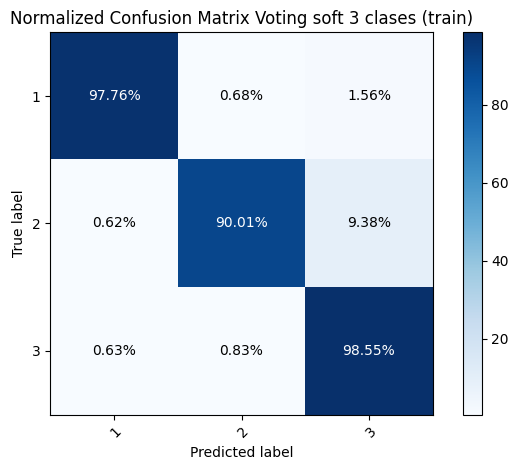

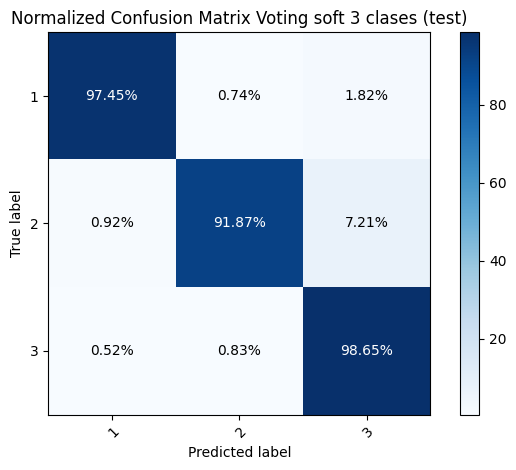

Precisión: [0.98509174 0.9422043  0.97626194]
Recuperación: [0.97447533 0.91874181 0.98649021]
Accuracy: 0.9746465138956607
F1-score: [0.97975478 0.93032515 0.98134942]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1763
           1       0.94      0.92      0.93       763
           2       0.98      0.99      0.98      3627

    accuracy                           0.97      6153
   macro avg       0.97      0.96      0.96      6153
weighted avg       0.97      0.97      0.97      6153



In [6]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model_config = "svc_linear"
optuna_db = create_db(model_config, 3)
svc_linear_32 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "svc_rbf"
optuna_db = create_db(model_config, 3)
svc_32 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)

model_config = "catboost"
optuna_db = create_db(model_config, 3)
catboost_32 = pipeline_config(model_config, pipeline_steps[model_config], optuna_db)
catboost_32 = CatBoostWrapper(catboost_32)

classifiers = [('SVC', svc_32),
               ('SVC Linear', svc_linear_32),
               ('Catboost', catboost_32)
              ]

# Clasificador personalizado
voting_clf = WeightedVotingClassifier(
    estimators=classifiers,
    class_weights={
        0: [0.6, 0.2, 0.2],  # Pesos para clase 0
        1: [0.2, 0.6, 0.2],  # Pesos para clase 1
        2: [0.3, 0.2, 0.5],  # Pesos para clase 2
    }
)

# Entrenamiento
voting_clf.fit(X, y)

# Predicción
y_train_pred = voting_clf.predict(X_train)
y_test_pred = voting_clf.predict(X_test)
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)
display_cm_normalized(cm_train, 'Voting soft 3 clases (train)')
display_cm_normalized(cm_test, 'Voting soft 3 clases (test)')

print(f"Precisión: {precision_score(y_test, y_test_pred, zero_division=0, pos_label=1, average=None)}")
print(f"Recuperación: {recall_score(y_test, y_test_pred, zero_division=0, pos_label=1, average=None)}")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(f"F1-score: {f1_score(y_test, y_test_pred, average=None)}")
print(classification_report(y_test, y_test_pred))